# *Titanic exploration*

Problem based on: https://www.kaggle.com/c/titanic


In [153]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# use ggplot style for all graphics
plt.style.use('ggplot');
# use this for interactive mode, but may reduce performance/battery life
#%matplotlib nbagg 

In [154]:
# create dataframe to hold titanic data imported from a csv
df = pd.read_csv("/Users/michaelschoeffler/Documents/ds_portfolio/titanic/titanic_dropna.csv")
# modify dataframe to sort by last name - will help look for anomalies
df = df.sort_values(by="Name")

## **1) What do you notice about the data? Any issues?**
  - The "Name" field is unstructured, with nicknames, maiden and married names, etc.
  - Unknown cabins show as NaN
  - Some field headings are not easily interpreted (SibSp, Parch)
  - Meanings for data in some fields is not obvious (Ticket code, Embarcation code)

In [155]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
673,846,0,3,"Abbing, Mr. Anthony",male,42.00,0,0,C.A. 5547,7.5500,NaN,S
592,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.00,1,1,C.A. 2673,20.2500,NaN,S
223,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.00,1,1,C.A. 2673,20.2500,NaN,S
244,309,0,2,"Abelson, Mr. Samuel",male,30.00,1,0,P/PP 3381,24.0000,NaN,C
697,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.00,1,0,P/PP 3381,24.0000,NaN,C
291,366,0,3,"Adahl, Mr. Mauritz Nils Martin",male,30.00,0,0,C 7076,7.2500,NaN,S
322,402,0,3,"Adams, Mr. John",male,26.00,0,0,341826,8.0500,NaN,S
31,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.00,1,0,7546,9.4750,NaN,S
681,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.00,0,1,392091,9.3500,NaN,S
164,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.00,0,0,2699,18.7875,NaN,C


## **2) What role does gender play in surviving?**

75% of women survived and only 20% of men. "Women and children first" seems to have been operating smoothly, even on a doomed ship.

The obvious contrast is the 2012 Costa Concordia disaster, where the captain abandoned ship against orders, leaving behind passengers to drown.

In [156]:
# calc the average survival rates
gender_averaged = df.loc[:,['Survived', 'Sex']].groupby(['Sex']).mean();
# print
gender_averaged

,Survived
Sex,
female,0.752896
male,0.205298


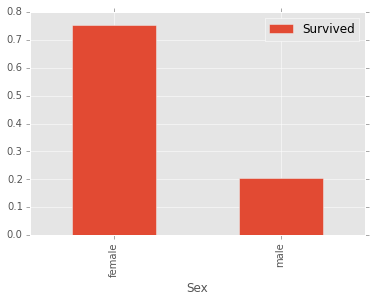

In [157]:
# plot the different sexes
gender_averaged.plot(kind = 'bar');

## **3) How did class affect survival?**

The survival rate was better in first class (65%) than in second class (48%) than in third class (24%).

In [158]:
# calc the average survival rates
Pclass_averaged = df.loc[:,['Survived', 'Pclass']].groupby(['Pclass']).mean();
# print
Pclass_averaged

,Survived
Pclass,
1,0.652174
2,0.479769
3,0.239437


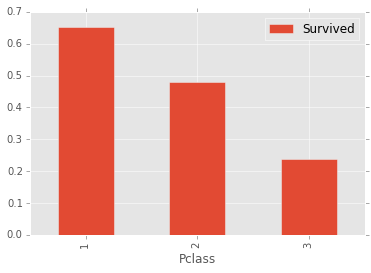

In [159]:
# plot the different classes
Pclass_averaged.plot(kind = 'bar');

## **4) How did age affect survival?**

The very young (under 16) did well (55%) and the elderly (over 64) fared poorly (9%). Middle-aged adults (16-64) survived better if they were older.

In [160]:
# calc the average survival rates
# age is continuous (and would be difficult to interpret with simple grouping)
# break data into fifths by age
age_averaged = df.loc[:,['Survived']].groupby(pd.cut(df['Age'],5)).mean();
# print
age_averaged

,Survived
Age,
"(0.34, 16.336]",0.550000
"(16.336, 32.252]",0.369942
"(32.252, 48.168]",0.401070
"(48.168, 64.084]",0.426471
"(64.084, 80]",0.090909


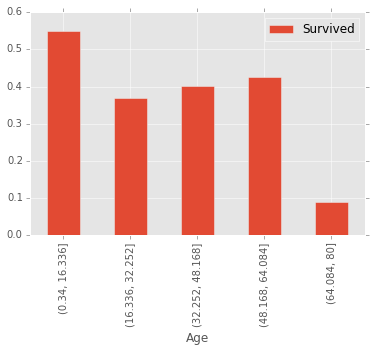

In [161]:
# plot the different ages
age_averaged.plot(kind = 'bar');

## **5) Given the above, do you have any guesses on what predicts survival?**

I believe passengers survived more if they were very young, female, or travelled first class.

The next step would be to investigate correlated data. Maybe the third class passengers fared poorly because they were overwhelmingly male.

## **6) Do you have any ideas for new features?**
  - Cabin in initial damage zone - maybe some passengers died immediately, skewing the survival rates
  - Ethnicity (by last name) - maybe some ethnicities were favored beyond ticket class
  - Marital status (derived from name field) - maybe husbands sacrificed themselves for their families more than other men
  - Travelling with family (derived from other passengers) - maybe family worked to save each other

## **Conclusion**

I checked for possible correlations (using "group by" only), but the patterns hold true. 

If you were an adult male travelling in 2nd or 3rd class, the voyage was almost guaranteed to be deadly. Of these 300 men, only 11% survived. An adult male in first class had almost three times the odds.

The cold data suggests an awful scene: these men were trapped aboard to echoes of "women and children first", as many of their "betters" scampered on lifeboats. 

The tragedy also spread to first class. Many upper class men also perished - probably with more choice in the matter.

In [162]:
# calc the average survival rates
# age is continuous (and would be difficult to interpret with simple grouping)
# break data into fifths by age
multiple_averaged = df.loc[:,['Survived', 'Sex', 'Pclass']].groupby(
     ['Sex', 'Pclass', pd.cut(df['Age'],5)]).mean();
# print
multiple_averaged

Survived
Sex    Pclass Age                       
female 1      (0.34, 16.336]    0.833333
              (16.336, 32.252]  0.968750
              (32.252, 48.168]  1.000000
              (48.168, 64.084]  0.937500
              (64.084, 80]           NaN
       2      (0.34, 16.336]    1.000000
              (16.336, 32.252]  0.916667
              (32.252, 48.168]  0.909091
              (48.168, 64.084]  0.833333
              (64.084, 80]           NaN
       3      (0.34, 16.336]    0.545455
              (16.336, 32.252]  0.461538
              (32.252, 48.168]  0.250000
              (48.168, 64.084]  1.000000
              (64.084, 80]           NaN
male   1      (0.34, 16.336]    1.000000
              (16.336, 32.252]  0.444444
              (32.252, 48.168]  0.435897
              (48.168, 64.084]  0.269231
              (64.084, 80]      0.166667
       2      (0.34, 16.336]    0.818182
              (16.336, 32.252]  0.062500
              (32.252, 48.168]  0.074074
              (48.168, 64.084]  0.090909
              (64.084, 80]      0.000000
       3      (0.34, 16.336]    0.270270
              (16.336, 32.252]  0.165563
              (32.252, 48.168]  0.055556
              (48.168, 64.084]  0.000000
              (64.084, 80]      0.000000

In [163]:
# df[(df['Age'] > 17) & (df['Sex'] == 'male') & (df['Pclass'] > 1)].mean()
df.loc[(df['Age'] > 17) & (df['Sex'] == 'male') & (df['Pclass'] > 1), ['Survived']].describe()

,Survived
count,298.000000
mean,0.114094
std,0.318460
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000
